# ELEN 6885 Reinforcement Learning Coding Assignment (Part 1, 2, 3)#
## Taxi Problem Overview
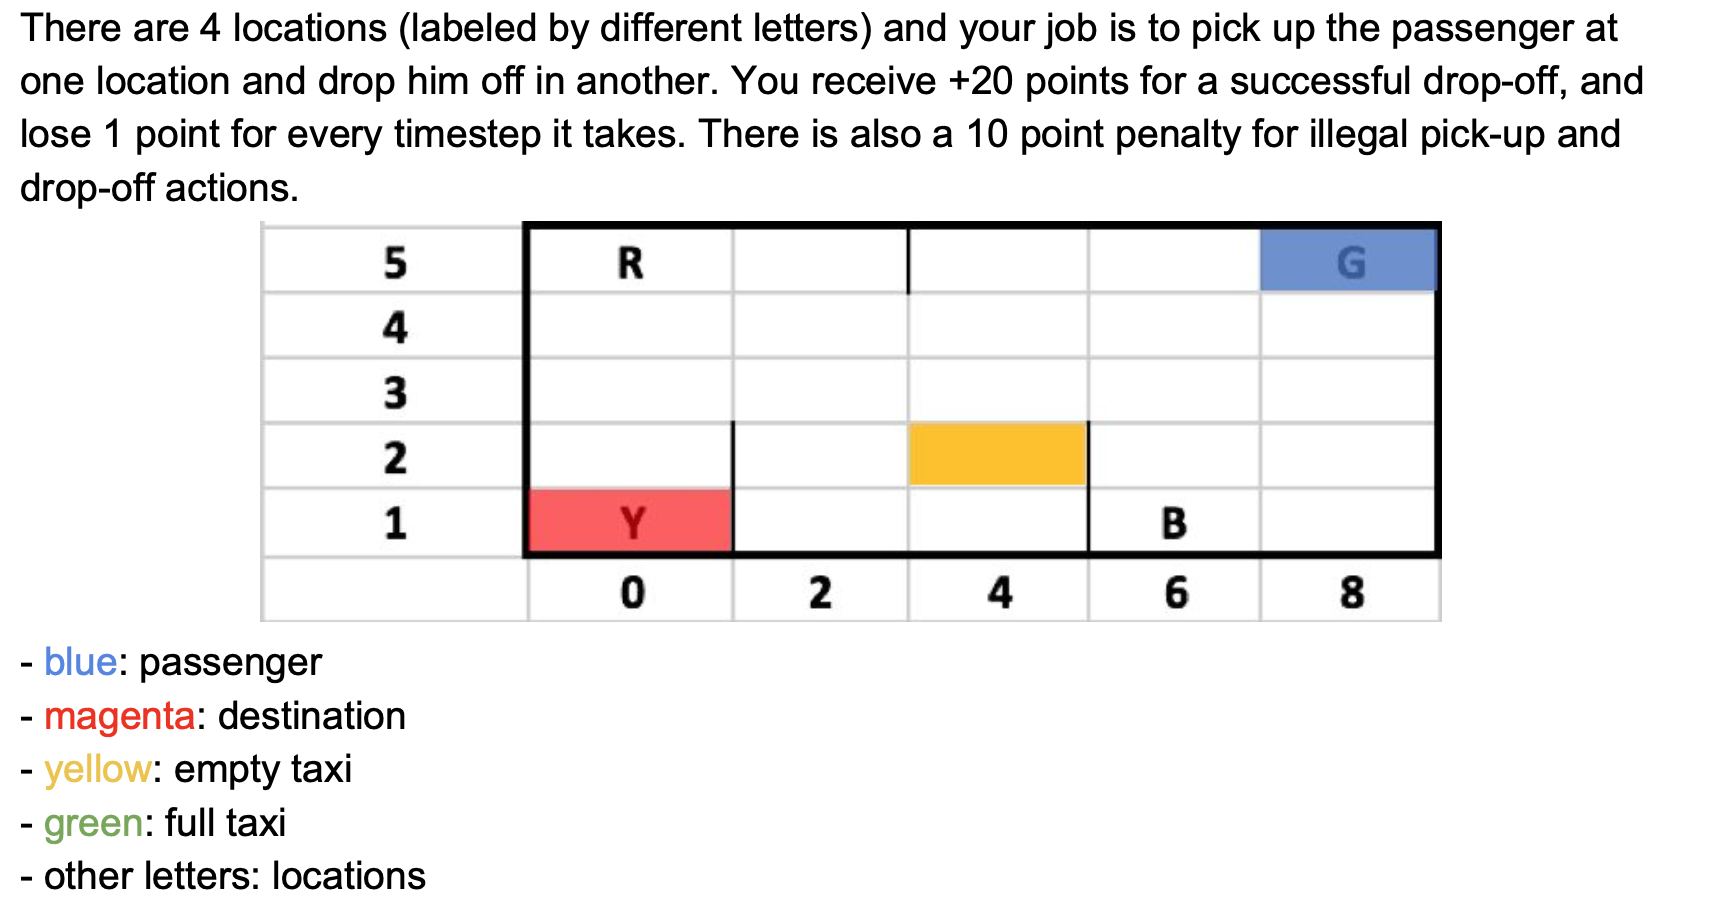
Please put your code into the block marked by:<br/>
############################<br/>
YOUR CODE STARTS HERE<br/>
YOUR CODE ENDS HERE<br/>
############################<br/>
You should not edit anything outside of the block.

# Playing with the environment

Run the cell below to get a feel for the environment by moving your agent(the taxi) by taking one of the actions at each step.

In [2]:
from gym.wrappers import Monitor
import gym
import random
import numpy as np

In [3]:
"""
You can test your game now.
Input range from 0 to 5:
    0 : South (Down)
    1 : North (Up)
    2 : East (Right)
    3 : West (Left)
    4: Pick up
    5: Drop off
    6: exit_game
"""
GAME = "Taxi-v3"
env = gym.make(GAME)
env = Monitor(env, "taxi_simple", force=True)
s = env.reset()
steps = 100
for step in range(steps):
    env.render()
    action = int(input("Please type in the next action:"))
    if action==6:
        break
    s, r, done, info = env.step(action)
    print('state:',s)
    print('reward:',r)
    print('Is state terminal?:',done)
    print('info:',info)

# close environment and monitor
env.close()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Please type in the next action:6


## 1.1 Incremental implementation of average

We've finished the incremental implementation of average for you. Please call the function to estimate with 1/step step size and fixed step size to compare the difference between these two on a simulated Bandit problem.

In [4]:
def estimate(OldEstimate, StepSize, Target):
    '''An incremental implementation of average.
    OldEstimate : float
    StepSize : float
    Target : float
    '''
    NewEstimate = OldEstimate + StepSize * (Target - OldEstimate)
    return NewEstimate

In [7]:
random.seed(6885)
numTimeStep = 10000
q_h = np.zeros(numTimeStep + 1) # Q Value estimate with 1/step step size
q_f = np.zeros(numTimeStep + 1) # Q value estimate with fixed step size
FixedStepSize = 0.5 #A large number to exaggerate the difference
for step in range(1, numTimeStep + 1):
    if step < numTimeStep / 2:
        r = random.gauss(mu = 1, sigma = 0.1)
    else:
        r = random.gauss(mu = 3, sigma = 0.1)
    
    #TIPS: Call function estimate defined in ./helpers/utils.py
    ############################
    # YOUR CODE STARTS HERE
    q_h[step] = estimate(q_h[step-1], 1/step, r)
    q_f[step] = estimate(q_f[step-1], FixedStepSize, r)
    
    # YOUR CODE ENDS HERE
    ############################
    
q_h = q_h[1:]
q_f = q_f[1:]

Plot the two Q value estimates. (Please include a title, labels on both axes, and legends)

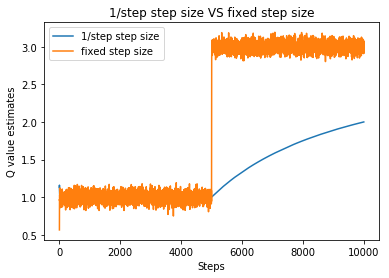

In [8]:
import matplotlib.pyplot as plt
############################
# YOUR CODE STARTS HERE
plt.title('1/step step size VS fixed step size')
plt.plot(q_h, label ='1/step step size')
plt.plot(q_f, label = 'fixed step size')
plt.xlabel('Steps')
plt.ylabel('Q value estimates')
plt.legend()
# YOUR CODE ENDS HERE
############################

## 1.2 $\epsilon$-Greedy for Exploration
In Reinforcement Learning, we are always faced with the dilemma of exploration and exploitation. $\epsilon$-Greedy is a trade-off between them. You are supposed to implement Greedy and $\epsilon$-Greedy. We combine these two policies in one function by treating Greedy as $\epsilon$-Greedy where $\epsilon = 0$. Edit the function epsilon_greedy the following block.

In [9]:
def epsilon_greedy(value, e, seed = None):
    '''
    Implement Epsilon-Greedy policy.

    Inputs:
    value: numpy ndarray
    A vector of values of actions to choose from
    e: float
    Epsilon
    seed: None or int
    Assign an integer value to remove the randomness

    Outputs:
    action: int
    Index of the chosen action
    '''
    assert len(value.shape) == 1
    assert 0 <= e <= 1

    if seed != None:
          np.random.seed(seed)

    ############################
    # YOUR CODE STARTS HERE
    p = np.random.uniform(low=0.0, high=1.0, size=None)
    #print(p)
    if p < e:
        action = random.randint(0,len(value)-1)
    else:
        action =  random.choice(np.where(value == value.max())[0])
    
    # YOUR CODE ENDS HERE
    ############################    
    return action

In [10]:
np.random.seed(6885) #Set the seed forreproducability
q = np.random.normal(0, 1, size = 5)
############################
# YOUR CODE STARTS HERE
e_greedy_action = epsilon_greedy(q,.1, 6885)
greedy_action = epsilon_greedy(q,0, 6885)
# YOUR CODE ENDS HERE
############################
print('Values:')
print(q)
print('Greedy Choice =', greedy_action)
print('Epsilon-Greedy Choice =', e_greedy_action)

Values:
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968]
Greedy Choice = 0
Epsilon-Greedy Choice = 0


You should get the following results:<br/>
Values:<br/>
[ 0.61264537  0.27923079 -0.84600857  0.05469574 -1.09990968\]<br/>
Greedy Choice = 0<br/>
Epsilon-Greedy Choice = 0<br/>

## 1.3 Exploration VS. Exploitation
Try to reproduce Figure 2.2 (the upper one is enough) of the Sutton's book based on the experiment described in Chapter 2.3.

In [ ]:
# Do the experiment and record average reward acquired in each time step
############################
# YOUR CODE STARTS HERE


# YOUR CODE ENDS HERE
############################

In [ ]:
# Plot the average reward
############################
# YOUR CODE STARTS HERE


# YOUR CODE ENDS HERE
############################

# Question 2
In this question, you will implement the value iteration and policy iteration algorithms to solve the Taxi game problem

## 2.1 Model-based RL: value iteration

For this part, you need to implement the helper functions action_evaluation(env, gamma, v), and extract_policy(env, v, gamma) in utils.py. Understand action_selection(q) which we have implemented. <br/>
Use these helper functions to implement the value_iteration algorithm below. 

In [20]:
import numpy as np
from helpers import utils
np.random.seed(6885) #Set the seed forreproducability
def value_iteration(env, gamma, max_iteration, theta):
    """
    Implement value iteration algorithm. You should use extract_policy to for extracting the policy.

    Parameters
    ----------
    env: OpenAI env. 
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    gamma: float
            Discount factor. 
    max_iteration: int
            The maximum number of iterations to run before stopping. 
    theta: float
            Determines when value function has converged.
    Returns:
    ----------
    value function: np.ndarray
    policy: np.ndarray
    """
    V = np.zeros(env.nS)
    ############################
    # YOUR CODE STARTS HERE
    for i in range(max_iteration):
        q = utils.action_evaluation(env,gamma,V)
        V_prev = V
        V = np.max(q,axis=1)
        if np.abs(V-V_prev).max() < theta:
            break 
    policy = utils.extract_policy(env,V,gamma)
    # YOUR CODE ENDS HERE
    ############################
    
    return V, policy


After implementing the above function, read and understand the functions implemented in evaluation_utils.py, which we will use to evaluate our value iteration policy

In [21]:
from helpers import evaluation_utils
import gym
GAME = "Taxi-v3"
env = gym.make(GAME)
V_vi, policy_vi = value_iteration(env, gamma=0.95, max_iteration=6000, theta=1e-5)
# visualize how the agent performs with the policy generated from value iteration
evaluation_utils.render_episode(env, policy_vi)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : :_|
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:_|
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Episode reward: 12.000000


In [22]:
# evaluate the performance of value iteration over 100 episodes
evaluation_utils.avg_performance(env, policy_vi)

7.666666666666667

## 2.2 Model-based RL: policy iteration
In this part, you are supposed to implement policy iteration to solve the Taxi game problem.

In [ ]:
from helpers import utils
def policy_iteration(env, gamma, max_iteration, theta):
    """Implement Policy iteration algorithm.

    You should use the policy_evaluation and policy_improvement methods to
    implement this method.

    Parameters
    ----------
    env: OpenAI env.
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    gamma: float
            Discount factor. 
    max_iteration: int
            The maximum number of iterations to run before stopping. 
    theta: float
            Determines when value function has converged.
    Returns:
    ----------
    value function: np.ndarray
    policy: np.ndarray
    """

    V = np.zeros(env.nS)
    policy = np.zeros(env.nS, dtype=int)
    ############################
    # YOUR CODE STARTS HERE
    
    ###
    
    ##DOUBLE CHECK THETA HERE AND AT VALUE ITERATION
    
    ###
    for i in range(max_iteration):
        V_prev = V
        V = policy_evaluation(env, policy, gamma, theta)
        policy = policy_improvement(env, V, policy, gamma)
        if np.abs(V-V_prev).max() < theta:
            break 
    # YOUR CODE ENDS HERE
    ############################
 
    return V, policy


def policy_evaluation(env, policy, gamma, theta):
    """Evaluate the value function from a given policy.

    Parameters
    ----------
    env: OpenAI env. 
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions

    gamma: float
            Discount factor. 
    policy: np.array
            The policy to evaluate. Maps states to actions.
    max_iteration: int
            The maximum number of iterations to run before stopping. 
    theta: float
            Determines when value function has converged.
    Returns
    -------
    value function: np.ndarray
            The value function from the given policy.
    """
    V = np.zeros(env.nS)
    P=env.P
    ############################
    # YOUR CODE STARTS HERE
    for s in range(env.nS):
        a = policy[s]
        q_s_a = 0
        for i in range(len(P[s][a])):
            next_state_tuple = P[s][a][i]
            v_next_state = v[next_state_tuple[1]]
            p_next_state = next_state_tuple[0]
            reward_next_state = next_state_tuple[2]
            q_s_a+=  p_next_state*(reward_next_state + gamma*v_next_state)
        V[s] = q_s_a

    # YOUR CODE ENDS HERE
    ############################

    return V


def policy_improvement(env, value_from_policy, policy, gamma):
    """Given the value function from policy, improve the policy.

    Parameters
    ----------
    env: OpenAI env
            env.P: dictionary
                    the transition probabilities of the environment
                    P[state][action] is tuples with (probability, nextstate, reward, terminal)
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    
    value_from_policy: np.ndarray
            The value calculated from the policy
    policy: np.array
            The previous policy.
    gamma: float
            Discount factor. 

    Returns
    -------
    new policy: np.ndarray
            An array of integers. Each integer is the optimal action to take
            in that state according to the environment dynamics and the
            given value function.
    stable policy: bool
            True if the optimal policy is found, otherwise false 
    """
    ############################
    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE
    ############################

    return new_policy, policy_stable


In [ ]:
## Testing out policy iteration policy for one episode
GAME = "Taxi-v3"
render_episode(env, policy_vi)
env = gym.make("Taxi-v3")
V_pi, policy_pi = policy_iteration(env, gamma=0.95, max_iteration=6000, theta=1e-5)

In [ ]:
# visualize how the agent performs with the policy generated from policy iteration
evaluation_utils.render_episode(env, policy_pi)

In [ ]:
# evaluate the performance of policy iteration over 100 episodes
print(evaluation_utils.avg_performance(env, policy_pi))

# Part 3: Q-learning and SARSA

## 3.1 Model-free RL: Q-learning
In this part, you will implement Q-learning.

In [ ]:
def QLearning(env, num_episodes, gamma, lr, e):
"""
    Implement the Q-learning algorithm following the epsilon-greedy exploration.
    Inputs:
    env: OpenAI Gym environment 
            env.P: dictionary
                    P[state][action] are tuples of tuples tuples with (probability, nextstate, reward, terminal)
                    probability: float
                    nextstate: int
                    reward: float
                    terminal: boolean
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.
    Outputs:
    Q: numpy.ndarray
    """
    Q = np.zeros((env.nS, env.nA))
    
    ############################
    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE
    ############################

    return Q

In [ ]:
Q = QLearning(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

In [ ]:
# Uncomment the following to evaluate your result, comment them when you generate the pdf
# env = gym.make('Taxi-v3')
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)

## 3.2 Model-free RL: SARSA
In this part, you will implement Sarsa.

In [ ]:
def SARSA(env, num_episodes, gamma, lr, e):
    """
    Implement the SARSA algorithm following epsilon-greedy exploration.
    Inputs:
    env: OpenAI Gym environment 
            env.P: dictionary
                    P[state][action] are tuples of tuples tuples with (probability, nextstate, reward, terminal)
                    probability: float
                    nextstate: int
                    reward: float
                    terminal: boolean
            env.nS: int
                    number of states
            env.nA: int
                    number of actions
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.
    Outputs:
    Q: numpy.ndarray
            State-action values
    """
    Q = np.zeros((env.nS, env.nA))
    ############################
    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE
    ############################

    return Q

In [ ]:
def render_episode_Q(env, Q):
    """Renders one episode for Q functionon environment.

      Parameters
      ----------
      env: gym.core.Environment
        Environment to play Q function on. 
      Q: np.array of shape [env.nS x env.nA]
        state-action values.
    """

    episode_reward = 0
    state = env.reset()
    done = False
    while not done:
        env.render()
        time.sleep(0.5)  
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        episode_reward += reward

    print ("Episode reward: %f" %episode_reward)

In [ ]:
Q = SARSA(env = env.env, num_episodes = 1000, gamma = 1, lr = 0.1, e = 0.1)
print('Action values:')
print(Q)

In [ ]:
# Uncomment the following to evaluate your result, comment them when you generate the pdf
# env = gym.make('Taxi-v3')
# policy_estimate = action_selection(Q)
# render(env, policy_estimate)